In [1]:
# designed by A. Wildridge 
# improved by L. He 
# 02/12/2024

In [2]:
import numpy as np
import vector
import hist
import uproot
import matplotlib.pyplot as plt

In [3]:
# read in the data
input_file = uproot.open('/home/he614/phys324/cms-machinelearning-notebooks/HW/input.root')

In [4]:
# see whats inside
input_file.keys()

['data;1', 'Z_to_l_lbar;1', 'Background;1']

## This file contains the observed data labeled "data". The theory prediction for a Z boson decaying to a lepton and an antilepton "Z_to_l_lbar" and theory predictions for other decays labeled "Background".

In [5]:
for key in input_file.keys():
    print(f'{key} has the following data associated with it: {input_file[key].keys()}')

data;1 has the following data associated with it: ['m', 'px', 'py', 'pz']
Z_to_l_lbar;1 has the following data associated with it: ['m', 'px', 'py', 'pz', 'weights']
Background;1 has the following data associated with it: ['m', 'px', 'py', 'pz', 'weights']


In [6]:
# store the data in some variables
data_mass = input_file['data']['m'].array()
signal_mass = input_file['Z_to_l_lbar']['m'].array()
signal_weights = input_file['Z_to_l_lbar']['weights'].array()
background_mass = input_file['Background']['m'].array()
background_weights = input_file['Background']['weights'].array()

# Problem 1:
## Make a plot of the dilepton invariant mass distribution $m_{l\bar{l}}$ (labeled "mass" in the file) to see what the data looks like compared to our theory predictions.

In [55]:
# make and fill your histograms
######################
# need to change binning!!!!
##################
h_data = hist.Hist(hist.axis.Regular(2, 0, 500))
h_signal = hist.Hist(hist.axis.Regular(2, 0, 500), storage=hist.storage.Weight())
h_background = hist.Hist(hist.axis.Regular(2, 0, 500), storage=hist.storage.Weight())

h_data.fill(data_mass)
h_signal.fill(signal_mass, weight=signal_weights)
h_background.fill(background_mass, weight=background_weights)

Hist(Regular(2, 0, 500, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=1.0001e+07, variance=1.33371e+07) (WeightedSum(value=1.00014e+07, variance=1.33377e+07) with flow)

## When you actually plot the histogram, you should realize that the binning is quite large. Go ahead and redefine the histogram bin edges to see more fine binned results. <br> Then plot the ratio of $\frac{data}{(signal+background)}$ in the second subplot undereath.
## If your plot is small the first time you run the following cell, try to run it again to enlarge it. I don't know why matplotlib behaves like this, but just give it a try. 

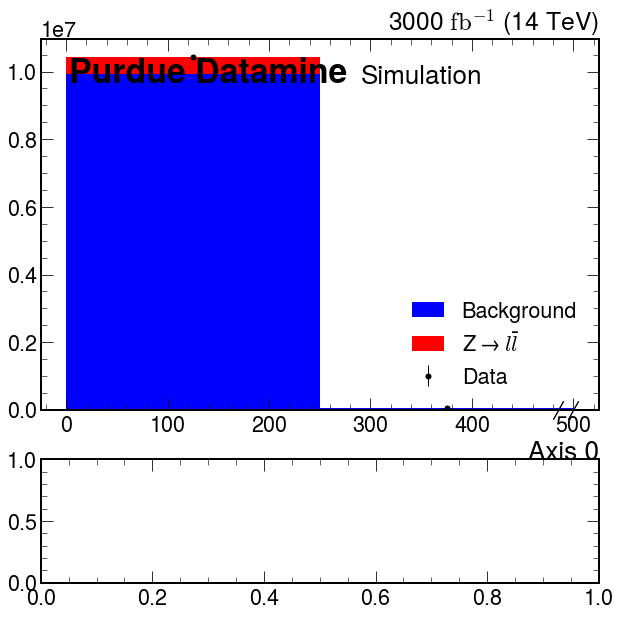

In [57]:
# let's plot the momentum in the x direction
import mplhep as hep

fig, (ax, rax) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[3,1]})

hep.style.use(hep.style.CMS)
plt.rcParams.update({'mathtext.fontset': 'cm'})
#hep.label.lumitext('3000 $fb^{-1}$\t\t\t')
hep.label.exp_label('Purdue Datamine', loc=1, com='14', lumi=3000, ax=ax)
hep.histplot(
    h_data,
    histtype='errorbar',
    color='black',
    label='Data',
    ax=ax
    # options..
)

hep.histplot(
    [h_background, h_signal],
    histtype='fill',
    color=['blue', 'red'],
    stack=True,
    label=['Background', r'$Z\rightarrow \mathit{l} \bar{\mathit{l}}$'],
    ax=ax
    # options..
)
########################
# make a ratio of data to prediction
##################3
#hep.histplot(,ax=rax)
#ax.set_ylim(0, 3e6)
ax.legend(loc=4)


# Problem 2:
## Estimate the number of signal events and background events in the data

In [47]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def signal_function(x, mass, width, num_events):
    """
        @param x: The x value that you are fitting on (dilepton invariant mass for example)
        @param mass: The mass of the signal model that you are trying to extract
        @param width: The width of the mass peak that you are trying to extract
        @param num_events: The number of events that lie within the mass peak.
    """
    return num_events * np.exp(-1 * (x - mass) ** 2 / (2 * width ** 2))

def background_function(x, lambduh, num_events):
    """
        @param x: The x value that you are fitting on (dilepton invariant mass for example)
        @param lambduh: Shape parameter for the background (falling exponential)
        @param num_events: The number of events that lie within the mass peak.
    """
    return num_events * lambduh * np.exp(-1 * lambduh * x)

def combined_function(x, mass, width, num_signal_events, num_bkg_events, lambduh):
    return signal_function(x, mass, width, num_signal_events) + background_function(x, lambduh, num_bkg_events)

In [49]:
x = # define your x-axis points. Hint: Grab them from the histograms that you filled - use a combination of .axes[index] and .centers. You may notice that there's only x-axis found if you use .axes because y-axis values are stored in .values or .counts. 
params, covariance = curve_fit(combined_function, x, y, sigma=y_err, p0=[172, 10, 1e6, 1e7, 1], absolute_sigma=True) 
# Hint: You can access y and y_err with .values() and .variances() features. 

/tmp/ipykernel_17708/2219130578.py:21: RuntimeWarning: overflow encountered in exp
  return num_events * lambduh * np.exp(-1 * lambduh * x)


### You need to divide the histograms finely, I tested with only a few number of bins and it doesn't run on the combined function. A large number of bins will work. It's better to include the initial guess of fit parameters as an argument p0=[mass, width, n_signal_events, n_bkg_events, lamda]. Replace mass, width etc. with a number of your best estimate otherwise the result will diverge under certain circumstances.

In [50]:
params, covariance

(array([ 1.53327550e+02,  2.21803935e+01, -3.91189306e+04,  1.07836638e+08,
         1.79361120e-02]),
 array([[ 1.61427814e+02, -1.50272724e+01,  1.22694499e+04,
         -4.36920502e+06,  1.06278187e-03],
        [-1.50272724e+01,  1.90298007e+02,  1.07472390e+05,
          9.86700677e+06, -2.55891404e-03],
        [ 1.22694499e+04,  1.07472390e+05,  3.85660939e+08,
         -7.78897601e+09,  2.16441410e+00],
        [-4.36920502e+06,  9.86700677e+06, -7.78897601e+09,
          3.22050293e+12, -6.45174160e+02],
        [ 1.06278187e-03, -2.55891404e-03,  2.16441410e+00,
         -6.45174160e+02,  1.95775006e-07]]))